<a href="https://colab.research.google.com/github/OrJaku/dm_sign_recognise/blob/master/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
cd drive/My Drive/Colab Notebooks/dw_matrix_3/dm_sign_recognise

/content/drive/My Drive/Colab Notebooks/dw_matrix_3/dm_sign_recognise


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']


In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [57]:
np.argmax(y_test, axis=1)

array([41, 41, 41, ..., 25, 25, 25])

In [0]:

df = pd.read_csv('data/signnames.csv')
lables_dict = df.to_dict()['b']

def predict(model_trained, x_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [0]:


def get_cnn_v1(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            Flatten(),
            Dense(num_classes, activation='softmax')
    
  ])




In [0]:
def train_model(model, x_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir=os.path.join('logs', str(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      x_train, 
      y_train,
      batch_size=params_fit.get('barch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (x_train, y_train)),
      callbacks= [tensorboard_callback]


      )
  return model

In [0]:
model_trained=train_model(get_cnn_v1(input_shape, num_classes), x_train, y_train)


In [40]:
predict(model_trained, x_test, y_test)

0.8482993197278912

<BarContainer object of 43 artists>

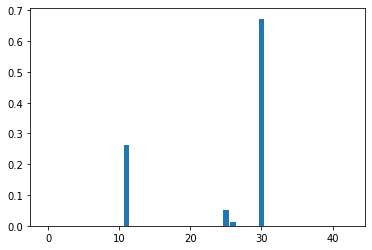

In [34]:

y_pred_prob = model_trained.predict(x_test)
lables_dict [ np.argmax (y_pred_prob[3200])]
plt.bar(range(43), y_pred_prob[3200])

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            MaxPool2D(),
            Dropout(0.5),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
    
  ])

params_fit= {
    'epochs':25

}

logdir=train_model(get_cnn_v2(input_shape, num_classes), x_train, y_train, params_fit)

In [0]:
%tensorboard --logdir logs

In [0]:
y_pred_prob = logdir.predict(x_test)
lables_dict [ np.argmax (y_pred_prob[3200])]

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            MaxPool2D(),
            Dropout(0.3),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),
            Flatten(),

            Dense(1024, activation='relu'),
            Dropout(0.3),
            
            Dense(num_classes, activation='softmax')
    
  ])

params_fit= {
    'epochs':5

}

# test=train_model(get_cnn_v2(input_shape, num_classes), x_train, y_train, params_fit)

In [50]:
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 5.4677 - accuracy: 0.3220 - val_loss: 1.2058 - val_accuracy: 0.7022
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 1.1209 - accuracy: 0.6723 - val_loss: 0.4481 - val_accuracy: 0.9056
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.6304 - accuracy: 0.8131 - val_loss: 0.1996 - val_accuracy: 0.9538
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.4042 - accuracy: 0.8800 - val_loss: 0.1293 - val_accuracy: 0.9718
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3058 - accuracy: 0.9080 - val_loss: 0.1027 - val_accuracy: 0.9813


0.9006802721088435

In [0]:
def get_cnn_v4(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),

            Dense(1024, activation='relu'),
            Dropout(0.3),
            
            Dense(num_classes, activation='softmax')
    
  ])

params_fit= {
    'epochs':5

}


In [54]:
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 10s 38ms/step - loss: 1.9777 - accuracy: 0.5623 - val_loss: 0.2422 - val_accuracy: 0.9549
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.3594 - accuracy: 0.8957 - val_loss: 0.0798 - val_accuracy: 0.9839
Epoch 3/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1964 - accuracy: 0.9430 - val_loss: 0.0322 - val_accuracy: 0.9918
Epoch 4/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1325 - accuracy: 0.9608 - val_loss: 0.0294 - val_accuracy: 0.9928
Epoch 5/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1092 - accuracy: 0.9676 - val_loss: 0.0116 - val_accuracy: 0.9969


0.9707482993197278

In [60]:
def get_cnn_v5(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"),
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            
            Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),

            Dense(1024, activation='relu'),
            Dropout(0.3),
            
            Dense(num_classes, activation='softmax')
    
  ])

params_fit= {
    'epochs':5

}
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 12s 44ms/step - loss: 2.4650 - accuracy: 0.3448 - val_loss: 0.6664 - val_accuracy: 0.8352
Epoch 2/5
272/272 [==============================] - 12s 43ms/step - loss: 0.6918 - accuracy: 0.7888 - val_loss: 0.2086 - val_accuracy: 0.9420
Epoch 3/5
272/272 [==============================] - 12s 43ms/step - loss: 0.3507 - accuracy: 0.8945 - val_loss: 0.0891 - val_accuracy: 0.9751
Epoch 4/5
272/272 [==============================] - 12s 43ms/step - loss: 0.2418 - accuracy: 0.9284 - val_loss: 0.0542 - val_accuracy: 0.9829
Epoch 5/5
272/272 [==============================] - 12s 43ms/step - loss: 0.1803 - accuracy: 0.9463 - val_loss: 0.0345 - val_accuracy: 0.9912


0.9625850340136054

In [0]:
def get_cnn_v6(input_shape, num_classes):
  return  Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
            Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"),
            MaxPool2D(),
            Dropout(0.3),

            Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            
            Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
            Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
            MaxPool2D(),
            Dropout(0.3),

            Flatten(),

            Dense(1024, activation='relu'),
            Dropout(0.3),

            Dense(1024, activation='relu'),
            Dropout(0.3),
            
            Dense(num_classes, activation='softmax')
    
  ])



In [0]:
|x_train_gray = color.rgb2gray( x_train ).reshape(-1, 32, 32, 1)
x_test_gray = color.rgb2gray( x_test ).reshape(-1, 32, 32, 1)

In [72]:
params_fit= {
    'epochs':8
}



model = get_cnn_v6((32, 32, 1), num_classes)
model_trained = train_model(model, x_train_gray, y_train, params_fit)
predict(model_trained, x_test_gray, y_test)

Epoch 1/8
272/272 [==============================] - 13s 47ms/step - loss: 2.4341 - accuracy: 0.3073 - val_loss: 0.7564 - val_accuracy: 0.7508
Epoch 2/8
272/272 [==============================] - 12s 45ms/step - loss: 0.5261 - accuracy: 0.8330 - val_loss: 0.1297 - val_accuracy: 0.9614
Epoch 3/8
272/272 [==============================] - 12s 46ms/step - loss: 0.2124 - accuracy: 0.9348 - val_loss: 0.0525 - val_accuracy: 0.9866
Epoch 4/8
272/272 [==============================] - 12s 45ms/step - loss: 0.1360 - accuracy: 0.9577 - val_loss: 0.0297 - val_accuracy: 0.9914
Epoch 5/8
272/272 [==============================] - 12s 45ms/step - loss: 0.1070 - accuracy: 0.9659 - val_loss: 0.0210 - val_accuracy: 0.9937
Epoch 6/8
272/272 [==============================] - 12s 45ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0142 - val_accuracy: 0.9961
Epoch 7/8
272/272 [==============================] - 12s 46ms/step - loss: 0.0695 - accuracy: 0.9788 - val_loss: 0.0148 - val_accuracy: 0.9955

0.9834467120181406

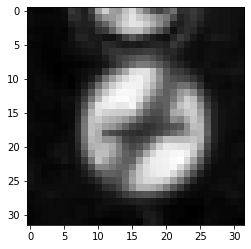

In [67]:
plt.imshow( color.rgb2gray (x_train[0]), cmap=plt.get_cmap("gray"))